In [5]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from keras import backend as K

In [6]:
K.set_image_dim_ordering('th')

In [7]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

In [8]:
PATH = os.getcwd()
data_path = PATH + '/data' # dir containing dataset
data_dir_list = os.listdir(data_path) # subdirectories (classes itself)
print(data_dir_list)

['dog', 'teddy']


In [9]:
# number of classes
num_classes = 2
# Loading dataset
img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-dog

Loaded the images of dataset-teddy

(82, 128, 128)


In [10]:
if K.image_dim_ordering()=='th':
    img_data= np.expand_dims(img_data, axis=1) 
    print (img_data.shape)
else:
    img_data= np.expand_dims(img_data, axis=4) 
    print (img_data.shape)
'''
if ordering as theano's 'th' (no. of channels comes at axis=1 i.e. 2nd pos.)
if it's tensorflow's 'tf' (no. of channels comes at axis=4 i.e. 5th pos.))
Ordering is already set to 'th'
'''

        

(82, 1, 128, 128)


"\nif ordering as theano's 'th' (no. of channels comes at axis=1 i.e. 2nd pos.)\nif it's tensorflow's 'tf' (no. of channels comes at axis=4 i.e. 5th pos.))\nOrdering is already set to 'th'\n"

In [11]:
# Labelling

num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64') 

labels[0:43]=0  #43 images of dog 
labels[44:82]=1 #39 images of teddy bear
names = ['dog','teddy bear']

#one-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
print(Y)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
#Shuffling the dataset
x,y = shuffle(img_data,Y, random_state=2) # random_seed-The seed of the pseudo random number generator
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
#test_size- represent the proportion of the dataset to include in the test split

In [13]:
X_train.shape, y_train.shape

((65, 1, 128, 128), (65, 2))

In [14]:
y_train.shape, y_test.shape

((65, 2), (17, 2))

In [15]:
input_shape=img_data[0].shape
print(input_shape)

(1, 128, 128)


In [16]:
# Defining the model
input_shape=img_data[0].shape

model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

C:\Users\Sarth\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(1, 128, 1...)`
  
C:\Users\Sarth\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
C:\Users\Sarth\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


In [17]:
# Training
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=12, verbose=1, validation_data=(X_test, y_test))
# nb_epoch - iterations for training the model


C:\Users\Sarth\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 65 samples, validate on 17 samples
Epoch 1/12
65/65 [==============================] - 13s 199ms/step - loss: 6.2717 - acc: 0.5077 - val_loss: 0.7972 - val_acc: 0.4706
Epoch 2/12
65/65 [==============================] - 11s 174ms/step - loss: 1.2418 - acc: 0.5077 - val_loss: 0.7993 - val_acc: 0.4706
Epoch 3/12
65/65 [==============================] - 12s 179ms/step - loss: 0.9569 - acc: 0.4923 - val_loss: 0.7005 - val_acc: 0.4706
Epoch 4/12
65/65 [==============================] - 12s 180ms/step - loss: 0.7185 - acc: 0.4923 - val_loss: 0.6956 - val_acc: 0.4706
Epoch 5/12
65/65 [==============================] - 12s 188ms/step - loss: 0.6846 - acc: 0.5077 - val_loss: 0.6910 - val_acc: 0.4706
Epoch 6/12
65/65 [==============================] - 12s 184ms/step - loss: 0.6837 - acc: 0.6000 - val_loss: 0.6794 - val_acc: 0.5882
Epoch 7/12
65/65 [==============================] - 12s 185ms/step - loss: 0.6714 - acc: 0.6308 - val_loss: 1.7554 - val_acc: 0.4706
Epoch 8/12
65/65 [=======

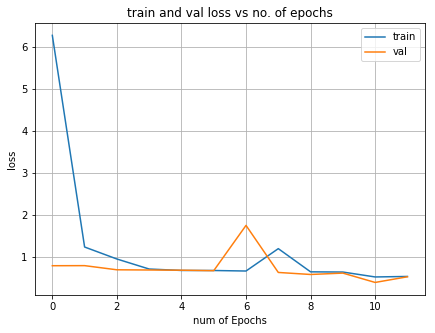

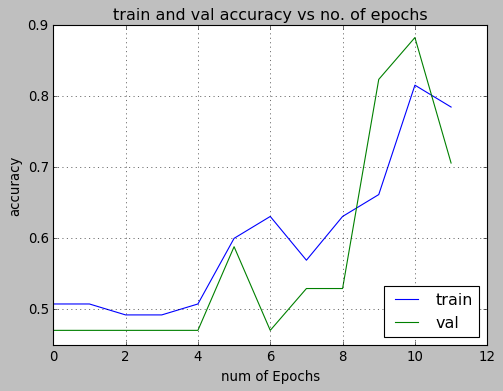

In [18]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(12) # no. of epochs

#plot loss vs no. of epochs
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train and val loss vs no. of epochs')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])
#plot accuracy vs no.   of e
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train and val accuracy vs no. of epochs')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [19]:
# model Eavluation

score = model.evaluate(X_test, y_test,verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.5344176292419434
Test accuracy: 0.7058823704719543


In [20]:
# Testing
test_image = cv2.imread('tb5rr.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
 
if K.image_dim_ordering()=='th':
    test_image= np.expand_dims(test_image, axis=0) 
    test_image= np.expand_dims(test_image, axis=0)
    print (test_image.shape)
else:
    test_image= np.expand_dims(test_image, axis=3) 
    test_image= np.expand_dims(test_image, axis=0)
    print (test_image.shape)
    
# Predicting the test image
print((model.predict(test_image)))
if model.predict_classes(test_image)==0:
    print("It's a dog")
else:
    print("It's a teddy bear")

(128, 128)
(1, 1, 128, 128)
[[0.33006218 0.6699378 ]]
It's a teddy bear


In [22]:
#Saving the model
from keras.models import model_from_json
from keras.models import load_model
model.save('model_2.hdf5')


In [ ]:
#loading the model
loaded_model=load_model('model_2.hdf5')

In [24]:
print((loaded_model.predict(test_image)))
if loaded_model.predict_classes(test_image)==0:
    print("It's a dog")
else:
    print("It's a teddy bear")

[[0.33006218 0.6699378 ]]
It's a teddy bear
